# Illusatration of the Morh Circles for planar stress state
Author : Emile.roux@univ-smb.fr

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.axislines import SubplotZero
from matplotlib.transforms import BlendedGenericTransform
import matplotlib.patches as patches
import matplotlib as mpl
import numpy as np
from ipywidgets import *
%matplotlib nbagg

plt.rcParams["figure.figsize"] = (8,4)

In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib nbagg

# INPUT : Stress tensor 

In [9]:
# Normal componants
S11=100
S22=-60
#Shear Componants
S12=45


In [10]:
# fullfill the tensor
Sigma=np.array([[S11,S12,.0],
                [S12,S22, .0 ],
                [.0,.0, 0.]],float)
print("Sigma=", Sigma)

Sigma= [[100.  45.   0.]
 [ 45. -60.   0.]
 [  0.   0.   0.]]


# Function which projet $\vec{\phi}$ into the $(\vec{n}, \vec{t})$ space
$$ \newcommand{\norme}[1]{\left\Vert #1\right\Vert} $$
For a given stress state the stress flux is given by :
$$ \vec{\phi_n} = \sigma . \vec{n} $$

The normal stress component $\sigma_{nn}$ is obtain by projetcion of $\vec{\phi_n}$ on the normal
$$\sigma_{nn} = \vec{\phi_n} . \vec{n} $$

The shear stress component $\sigma_{tn}$ is obtain by projetcion of $\vec{\phi_n}$ on the tangent
$$\sigma_{tn} = \vec{\phi_n} . \vec{t} $$


In [15]:
def Snn_Snt_decomposition (Sigma, n) :
    # Check that norm of n is equal to one
    n=n/np.linalg.norm(n)
    
    # Flux stress vector
    phi=np.dot(Sigma,n)
    
    # Normal stress component
    Snn=np.dot(phi,n)
    
    # Shear stress component
    t=np.array([-n[1], n[0], n[2]])
    Snt=np.dot(phi,t)
 
    
    return Snn,Snt,phi

# Setting for graph display

<IPython.core.display.Javascript object>


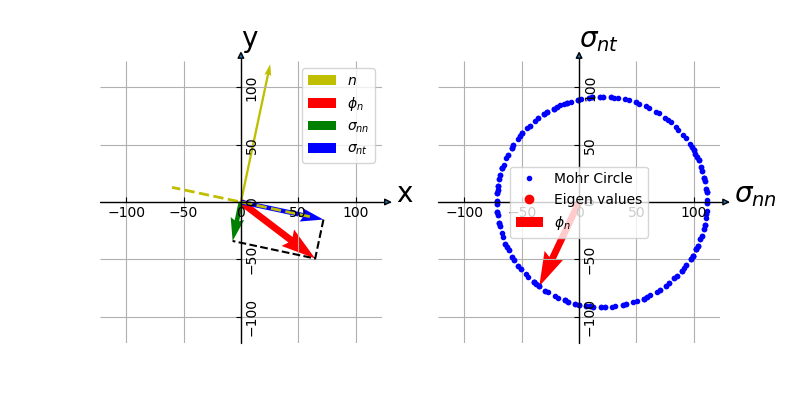

interactive(children=(FloatSlider(value=0.0, description='alpha', max=180.0, step=1.0), Checkbox(value=False, …

In [14]:
# ########################
# Set up the figure, the axis, and the plot element we want to animate
# ########################

fig = plt.figure(1)
Sig_max=np.max(np.linalg.eigvals(Sigma))*1.1


# x,y space
ax1 = SubplotZero(fig, 121)
fig.add_subplot(ax1)
#
for direction in ["xzero", "yzero"]:
    ax1.axis[direction].set_axisline_style("-|>")
    ax1.axis[direction].set_visible(True)
#
for direction in ["left", "right", "bottom", "top"]:
    ax1.axis[direction].set_visible(False)

ax1.set_aspect('equal')

ax1.set_xlim(-Sig_max, Sig_max)
ax1.set_ylim(-Sig_max, Sig_max)
ax1.text(0., 1.05, 'y',size=20, transform=BlendedGenericTransform(ax1.transData, ax1.transAxes))
ax1.text(1.05, -0.15, 'x',size=20, transform=BlendedGenericTransform(ax1.transAxes, ax1.transData))

line_proj,  = ax1.plot([],[],'k--')
facette,= ax1.plot([],[],'--y',lw=2)
vec_n  = ax1.quiver(0, 0, 0, 0,width=2,scale=1,units='x',label=r'$n$',color='y')

vec_phi_xy  = ax1.quiver(0, 0, 0, 0,width=6,scale=1,units='x',label=r'$\phi_n$',color='r')
vec_Snn_xy  = ax1.quiver(0, 0, 0, 0,width=4,scale=1,units='x',label=r'$\sigma_{nn}$',color='g')
vec_Snt_xy  = ax1.quiver(0, 0, 0, 0,width=4,scale=1,units='x',label=r'$\sigma_{nt}$',color='b')


ax1.grid() 
ax1.legend()


#  Snn,Snt space
ax2 = SubplotZero(fig, 122)
fig.add_subplot(ax2)
#
for direction in ["xzero", "yzero"]:
    ax2.axis[direction].set_axisline_style("-|>")
    ax2.axis[direction].set_visible(True)
#
for direction in ["left", "right", "bottom", "top"]:
    ax2.axis[direction].set_visible(False)

ax2.set_aspect('equal')

ax2.set_xlim(-Sig_max, Sig_max)
ax2.set_ylim(-Sig_max, Sig_max)
ax2.text(0., 1.05, '$\sigma_{nt}$',size=20, transform=BlendedGenericTransform(ax2.transData, ax2.transAxes))
ax2.text(1.05, -0.15, '$\sigma_{nn}$',size=20, transform=BlendedGenericTransform(ax2.transAxes, ax2.transData))

mohr_circle, = ax2.plot([], [], '.b',label='Mohr Circle')
vec_phi  = ax2.quiver(0, 0, 0, 0,width=6,scale=1,units='x',label=r'$\phi_n$',color='r')
VP_plot,  = ax2.plot([],[],'or', label='Eigen values')

ax2.legend()
ax2.grid()


def plt_mohr(alpha=0, eigen_values=False):
    alpha=np.deg2rad(alpha)
    n=np.array([np.cos(alpha),np.sin(alpha),0])
    Snn,Snt,phi = Snn_Snt_decomposition (Sigma, n)
    
    # espace x, y
    vec_phi_xy.set_UVC(phi[0],phi[1])
    vec_n.set_UVC(n[0]*Sig_max,n[1]*Sig_max)
    fac_x=np.array([n[1],-n[1]])*Sig_max/2
    fac_y=np.array([-n[0],n[0]])*Sig_max/2
    facette.set_data(fac_x,fac_y)
    
    vec_Snn_xy.set_UVC(n[0]*Snn,n[1]*Snn)
    vec_Snt_xy.set_UVC(-n[1]*Snt,n[0]*Snt)
    line_proj.set_data([-n[1]*Snt,phi[0],n[0]*Snn],[n[0]*Snt,phi[1],n[1]*Snn])
    
    # espace Snn, Snt
    x,y=mohr_circle.get_data()
    mohr_circle.set_data(np.append(x,Snn), np.append(y,Snt))
    vec_phi.set_UVC(Snn,Snt)
    
    if eigen_values:
        iegen_val=np.linalg.eigvals(Sigma)
        VP_plot.set_data(iegen_val,iegen_val*0)
    else:
        VP_plot.set_data([],[])     
        

interact(plt_mohr, Eigen_values=False, alpha=(0,180,1.))

plt.show()